In [7]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import random
import scipy.signal
import os
import scipy.stats as st
import spontaneous_activity_analyzer
import phase_analysis
import PGanalysis

In [8]:
os.chdir(r'S:\All_Staff\robin\Paper\phase_coding_manuscript\final_data\fig2')
spontaneous_spiking_PCx_control = np.load(r'spontaneous_spiking_PCx_control.npy', allow_pickle = True)[0]

In [9]:
all_percent_locked = []
for expt in spontaneous_spiking_PCx_control['all_spontaneously_locked']:
    all_percent_locked.append(np.mean(expt))

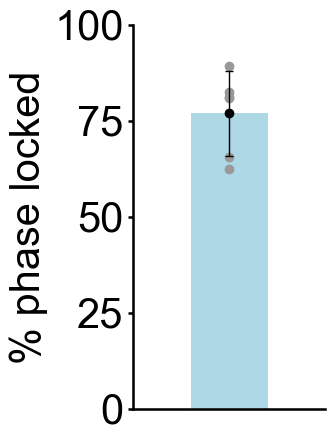

In [10]:
color = [[.4,.4,.4]]
plt.bar([0], [np.mean(all_percent_locked)*100],color = 'lightblue')
plt.ylim(0,100)
plt.xlim(-1,1)
plt.yticks([0,25,50,75,100])
plt.ylabel('% phase locked')

plt.xticks([])

plt.plot(np.zeros(len(all_percent_locked)), np.array(all_percent_locked)*100,'o', color = [.6,.6,.6])

phase_locked_err = np.mean(all_percent_locked) -st.t.interval(alpha=0.95, df=len(all_percent_locked)-1, loc=np.mean(all_percent_locked), scale=st.sem(all_percent_locked))[0]

plt.errorbar(0, np.mean(np.array(all_percent_locked)*100), yerr = phase_locked_err*100, fmt = 'o', capsize = 3, elinewidth = 1, capthick = 1, linewidth = .5, color= 'k')

PGanalysis.axis_fixer(ratio =2, size = 30)

In [11]:
all_percent_locked_spikes_flat = np.array([spike for spikes in spontaneous_spiking_PCx_control['all_percent_locked_spikes'] for spike in spikes])

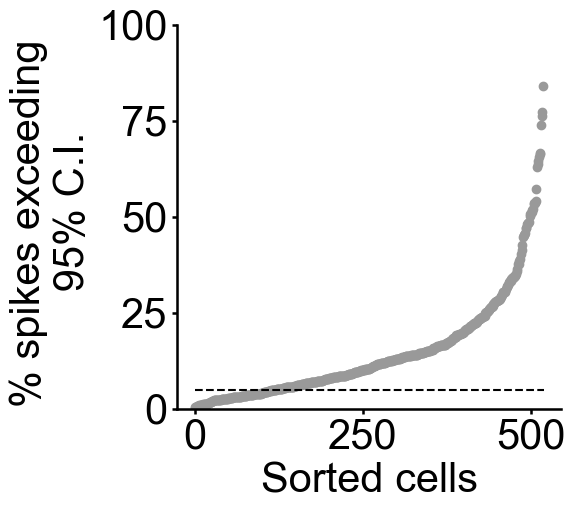

In [12]:
plt.plot(np.sort(all_percent_locked_spikes_flat),'o', color = [.6,.6,.6])
plt.plot([0, len(all_percent_locked_spikes_flat)],[5,5],'k--')
plt.ylim(0,100)
plt.xticks([0,250,500])
plt.ylabel('% spikes exceeding \n 95% C.I.')
plt.xlabel('Sorted cells')
PGanalysis.axis_fixer(ratio = 1, size = 30)

In [13]:
all_phase_hist_flat = np.array([hist for hists in spontaneous_spiking_PCx_control['all_phase_hist'] for hist in hists])
all_CI_lower_flat = np.array([hist for hists in spontaneous_spiking_PCx_control['all_lower_CI'] for hist in hists])
all_CI_upper_flat = np.array([hist for hists in spontaneous_spiking_PCx_control['all_upper_CI'] for hist in hists])

In [14]:
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))

In [15]:
all_spontaneously_locked_flat = np.array([curve for expt in spontaneous_spiking_PCx_control['all_spontaneously_locked'] for curve in expt])
significantly_locked = np.where(all_spontaneously_locked_flat == 1)[0]

In [17]:
all_spontaneous_bin_rate_flat = np.array([curve for expt in spontaneous_spiking_PCx_control['all_spontaneous_bin_rate'] for curve in expt])
all_spontaneous_bin_rate_flat_norm = all_spontaneous_bin_rate_flat/np.max(all_spontaneous_bin_rate_flat,1)[:,None]

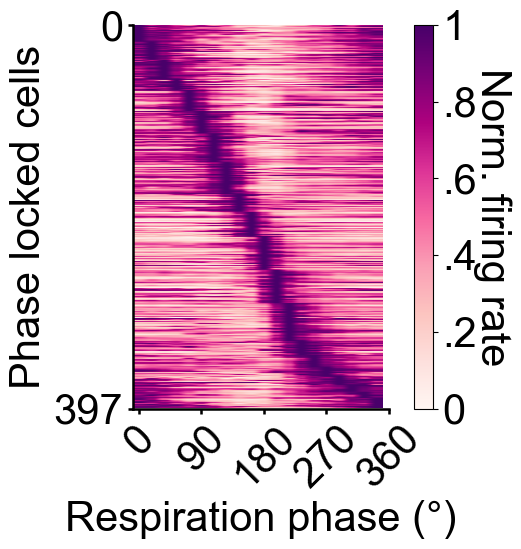

In [18]:
idx = np.argsort(np.argmax(all_spontaneous_bin_rate_flat_norm[significantly_locked,:],1))
plt.imshow(all_spontaneous_bin_rate_flat_norm[significantly_locked][idx,:], cmap = 'RdPu')
plt.clim(0,1)
plt.xticks(np.arange(0,25,5), labels = ['0','90','180','270', '360'], rotation = 45)
plt.yticks([0, len(significantly_locked)])
plt.ylabel('Phase locked cells')
plt.xlabel('Respiration phase (°)')
ax = plt.gca()
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
cbar.ax.set_yticks(np.arange(0,1.2,.2))
cbar.ax.set_yticklabels(['0', '.2','.4','.6','.8','1'])
cbar.ax.set_ylabel('Norm. firing rate', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25
PGanalysis.axis_fixer(ratio = 1.5, size = 30)

In [12]:
target_dir = r'Z:\robin\Paper\phase_coding_manuscript\data\fig1\phase_stats'
expt_list = ['230407.npy','230418.npy','230502.npy', '230508.npy', '230621.npy','230726.npy']

In [13]:
all_phase_expts = []
for expt in expt_list:
    load_path = os.path.join(target_dir, expt)
    phase_expt = np.load(load_path,allow_pickle = True)[0]
    all_phase_expts.append(phase_expt)

In [14]:
dict_keys = ['all_stim_time_to_50']
concat_rise_times = {}
for key in dict_keys:
    concat_rise_times[key] = phase_analysis.dict_key_concatenator(all_phase_expts, key)

In [15]:
dict_keys = ['stimulation_phase_preference']
concat_pref_phase = {}
for key in dict_keys:
    concat_pref_phase[key] = phase_analysis.dict_key_concatenator(all_phase_expts, key)

In [16]:
dict_keys = ['all_stim_resp_pref_phase']
concat_resp_phase = {}
for key in dict_keys:
    concat_resp_phase[key] = phase_analysis.dict_key_concatenator(all_phase_expts, key)

In [17]:
all_spontaneous_tuning_flat = np.array([curve for expt in spontaneous_spiking_PCx_control['all_spontaneous_tuning'] for curve in expt])

In [18]:
# here, we will define a n-cells x n-bins duration array for each cell in order to perform alignment 
respiration_bin_duration = np.empty_like(all_spontaneous_tuning_flat)
i = 0
for expt in range(len(spontaneous_spiking_PCx_control['all_spontaneous_tuning'])):
    for cell in range(len(spontaneous_spiking_PCx_control['all_spontaneous_tuning'][expt])):
        respiration_bin_duration[i,:] = spontaneous_spiking_PCx_control['all_duration_in_resp_bin'][expt]
        i+=1

In [19]:
# here we will get all significant tuning curves for all recorded cells
all_cell_stim_tuning = []
cell_count = 0
for expt in spontaneous_spiking_PCx_control['all_stim_tuning']:
    for cell in expt:
        all_cell_stim_tuning.append(cell)
        cell_count+=1

In [20]:
# here we will get all of the rise times for all significantly activating spots
cross_bin_mean_rise_times = np.nanmean(concat_rise_times['all_stim_time_to_50'],1)
all_sig_spot_rise_times = []
for cell in range(cross_bin_mean_rise_times.shape[1]):
    all_sig_spot_rise_times.append(cross_bin_mean_rise_times[:,cell][~np.isnan(cross_bin_mean_rise_times[:,cell])])

C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [21]:
def second_subtractor(tuning,cell,stim,all_duration_in_resp_bin,cell_latency):
    current_max_idx = np.argmax(tuning[cell][stim])
    ms_left = cell_latency
    shifter = np.arange(20)
    n_rolls = 0
    while ms_left>0:
        shifter = np.roll(shifter,-1)
        ms_left -= all_duration_in_resp_bin[shifter[current_max_idx]]*1000
        n_rolls += 1
    return n_rolls

In [22]:
bins = np.arange(0,np.radians(360)+np.radians(18), np.radians(18))

In [23]:
uncorrected_offset = []
corrected_offset = []
all_max_spont_bin = []
all_max_adjusted_stim_bin = []
for cell in range(len(all_cell_stim_tuning)):
    for stim in range(len(all_sig_spot_rise_times[cell])):
        cell_latency = all_sig_spot_rise_times[cell][stim]
        n_rolls = second_subtractor(all_cell_stim_tuning,cell,stim,respiration_bin_duration[cell], cell_latency)
        tuning = all_cell_stim_tuning[cell][stim]
        max_stim_bin = np.degrees(bins[:-1])[np.argmax(tuning)]
        max_spont_bin = np.degrees(bins[:-1])[np.argmax(all_spontaneous_tuning_flat[cell])]
        all_max_spont_bin.append(max_spont_bin)
        if max_stim_bin>max_spont_bin:
            uncorrected_offset.append((360-max_stim_bin) + (max_spont_bin))
        else:
            uncorrected_offset.append(max_spont_bin-max_stim_bin)
        rolled_tuning = np.roll(all_cell_stim_tuning[cell][stim], n_rolls)
        max_adjusted_stim_bin = np.degrees(bins[:-1])[np.argmax(rolled_tuning)]
        all_max_adjusted_stim_bin.append(max_adjusted_stim_bin)
        if max_adjusted_stim_bin>max_spont_bin:
            corrected_offset.append((360-max_adjusted_stim_bin) + (max_spont_bin))
        else:
            corrected_offset.append((max_spont_bin-max_adjusted_stim_bin))

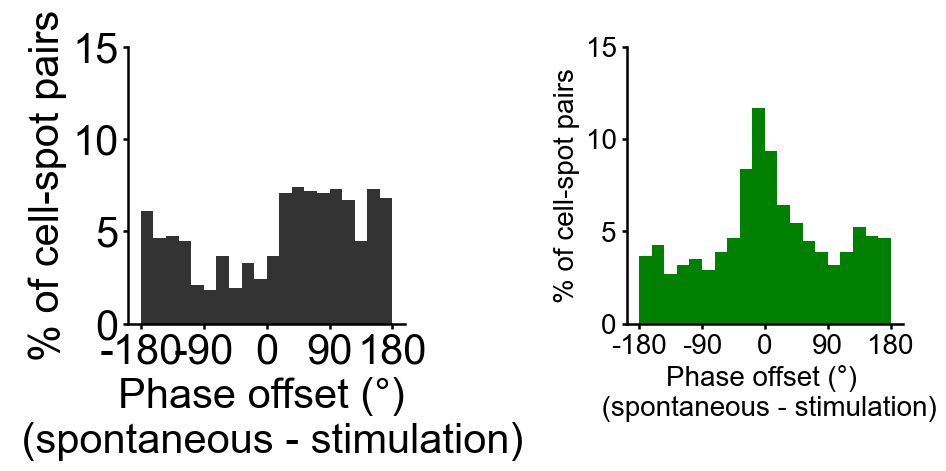

In [24]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
hist_uncorrected = np.histogram(uncorrected_offset, bins = np.degrees(bins))
plt.bar(np.arange(0,360,18), np.roll((hist_uncorrected[0]/np.sum(hist_uncorrected[0]))*100,9), width = 18, align = 'edge', color = [.2,.2,.2])
plt.xticks([0,90,180,270,360], labels = [-180, -90, 0, 90, 180])
plt.ylim(0,15)
plt.xlabel('Phase offset (°) \n (spontaneous - stimulation)')
plt.ylabel('% of cell-spot pairs')
PGanalysis.axis_fixer(ratio = 1, size = 20)


plt.subplot(1,2,2)
hist_corrected = np.histogram(corrected_offset, bins = np.degrees(bins))
plt.bar(np.arange(0,360,18), np.roll((hist_corrected[0]/np.sum(hist_corrected[0]))*100,9), width = 18, align = 'edge', color = 'g')
plt.xticks([0,90,180,270,360], labels = [-180, -90, 0, 90, 180])
plt.ylim(0,15)
plt.xlabel('Phase offset (°) \n (spontaneous - stimulation)')
plt.ylabel('% of cell-spot pairs')
PGanalysis.axis_fixer(ratio = 1, size = 20)

In [ ]:
cells = [11,91,70,176,71,166,179,5,201,203,208,222,231,233,249,259,273,275,281,285,291,300,312,317,321,334,339,340,348,353,354,368,374,381,386,387,401,402,404,415,436,441,452,456,463,475,476,487,493,498,504,508,513]


In [ ]:
#402 good example

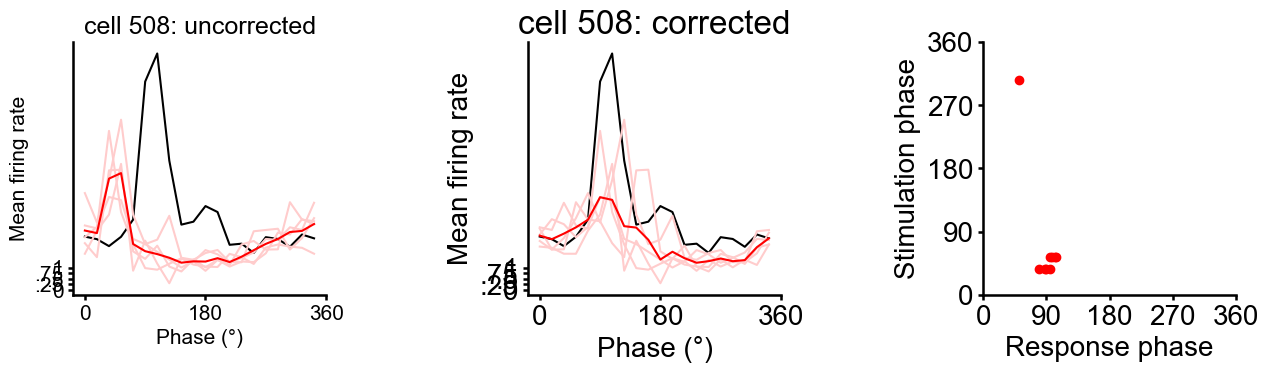

In [142]:
cell = 508
plt.figure(figsize = (15,15))

plt.subplot(1,3,1)
plt.plot(np.degrees(bins[:-1]),all_spontaneous_bin_rate_flat[cell], color = 'k') #/np.max(all_spontaneous_bin_rate_flat[cell]), color = 'k')
colors = [[1,.1,.1], [1,.15,.15], [1,.2,.2], [1,.3,.3], [1,.4,.4], [1,.5,.5], [1,.6,.6],[1,.7,.7],[1,.8,.8],[1,.9,.9]]
all_tuning = []
for stim in range(len(all_cell_stim_tuning[cell])):
    cell_latency = all_sig_spot_rise_times[cell][stim]
    tuning = all_cell_stim_tuning[cell][stim]
    all_tuning.append(tuning)
    plt.plot(np.degrees(bins[:-1]), tuning, color = [1,.8,.8]) #/np.max(tuning), color = [1,.8,.8]) #/np.max(all_stim_tuning_ravel[cell][0]),n_rolls))
plt.plot(np.degrees(bins[:-1]), np.mean(all_tuning,0), 'r') #/np.max(np.mean(all_tuning,0)),'r')
plt.ylabel('Mean firing rate')
plt.xlabel('Phase (°)')
plt.xticks([0,180,360])
#plt.ylim(0,1)
plt.yticks([0,.25,.5,.75,1], labels = ['0','.25','.5','.75','1'])
plt.title('cell ' + str(cell) + ': uncorrected')
#plt.ylim(0,5)
PGanalysis.axis_fixer(ratio = 1, size = 20)

plt.subplot(1,3,2)
plt.plot(np.degrees(bins[:-1]),all_spontaneous_bin_rate_flat[cell], color = 'k') #/np.max(all_spontaneous_bin_rate_flat[cell]), color = 'k')
colors = [[1,.1,.1], [1,.15,.15], [1,.2,.2], [1,.3,.3], [1,.4,.4], [1,.5,.5], [1,.6,.6],[1,.7,.7],[1,.8,.8],[1,.9,.9]]
all_tuning = []
for stim in range(len(all_cell_stim_tuning[cell])):
    cell_latency = all_sig_spot_rise_times[cell][stim]
    n_rolls = second_subtractor(all_cell_stim_tuning,cell,stim,respiration_bin_duration[cell], cell_latency)
    tuning = np.roll(all_cell_stim_tuning[cell][stim],n_rolls)
    all_tuning.append(tuning)
    plt.plot(np.degrees(bins[:-1]), tuning, color = [1,.8,.8]) #/np.max(tuning), color = [1,.8,.8]) #/np.max(all_stim_tuning_ravel[cell][0]),n_rolls))
plt.plot(np.degrees(bins[:-1]), np.mean(all_tuning,0),'r') #/np.max(np.mean(all_tuning,0)),'r')
plt.ylabel('Mean firing rate')
plt.xlabel('Phase (°)')
plt.xticks([0,180,360])
#plt.ylim(0,1)
plt.yticks([0,.25,.5,.75,1], labels = ['0','.25','.5','.75','1'])
plt.title('cell ' + str(cell) + ': corrected')
#plt.ylim(0,20)
PGanalysis.axis_fixer(ratio = 1, size = 20)

plt.subplot(1,3,3)
bins = np.arange(0,np.radians(360)+np.radians(18), np.radians(18))
for stim  in range(1,10):
    plt.plot(concat_resp_phase['all_stim_resp_pref_phase'][stim,:,cell],np.degrees(bins[0:-1]),'ro')
    plt.xlim(0,360)
    plt.ylim(0,360)
    plt.yticks([0,90,180,270,360])
    plt.xticks([0,90,180,270,360])
    plt.ylabel('Stimulation phase')
    plt.xlabel('Response phase')
    PGanalysis.axis_fixer(ratio = 1, size = 20)

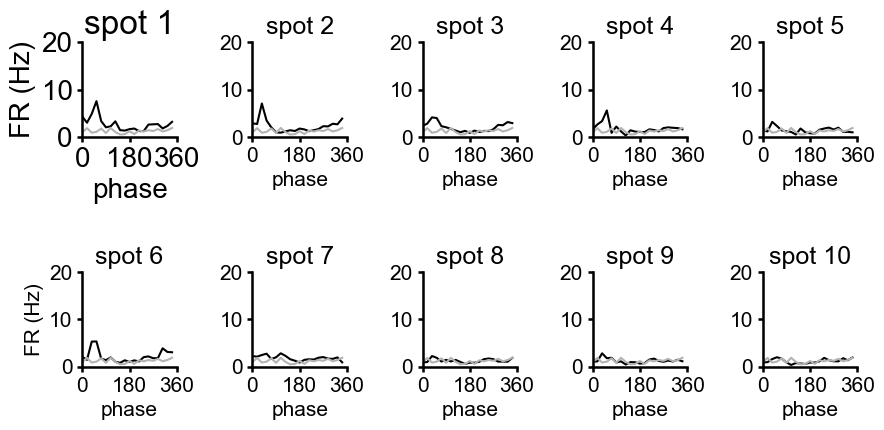

In [141]:
phase_analysis.plot_spot_tuning_curves(all_phase_tuning_concat, cell, ylim = 20)

In [28]:
# Load the tuning curves for all cell-stim pairs
expt_list_tuning = os.listdir(r'Z:\robin\Paper\phase_coding_manuscript\data\fig1\phase_tuning')
target_dir_tuning = r'Z:\robin\Paper\phase_coding_manuscript\data\fig1\phase_tuning'

all_phase_tuning = []
for expt in expt_list_tuning:
    load_path = os.path.join(target_dir_tuning, expt)
    phase_tuning = np.load(load_path,allow_pickle = True)[0]
    all_phase_tuning.append(phase_tuning)

# concatenate tuning curves for all cells across experiments 
all_phase_tuning_concat = all_phase_tuning[0]
for tun in all_phase_tuning[1:]:
    all_phase_tuning_concat = np.concatenate((all_phase_tuning_concat, tun), axis = 2)

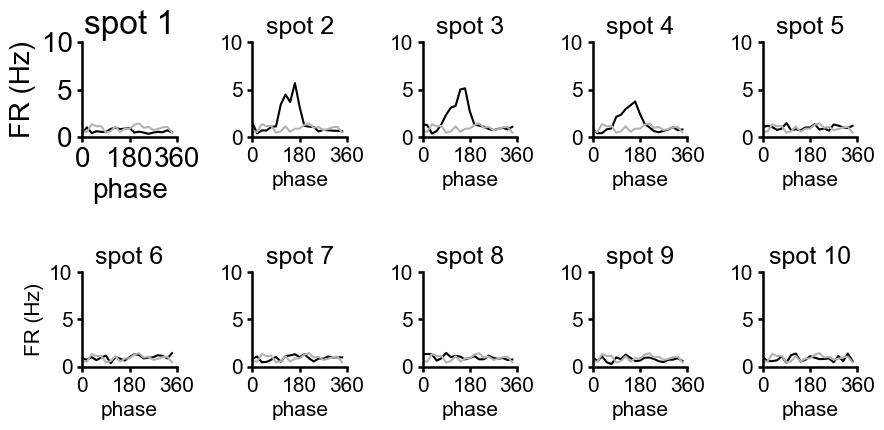

In [164]:
cell = 402
phase_analysis.plot_spot_tuning_curves(all_phase_tuning_concat, cell, ylim = 10)

In [ ]:
# cell 5 makes sense
# cell 7, reponds with delay during the window of excitability. This makes sense. 
# cell 11, weird case where cell preferentially repsonds at small peak at 180
# cell 13, phase advance 
# cell 26 makes sense 
# 45?
# 67?
# 70 makes sense 
# 71 makes sense 
# 76 makes sense 
# 91 makes sense 